### Multiple Linear Regression: $$y = b_{0} + b_{1}x_{1} + b_{2}x_{2}^{2} + ... +b_{n}x_{n}^{n}$$

## Main Task
> Predicting the net hourly electerical energy output of a plant!

## Data Understanding  

**1.0. What is the domain area of the dataset?**  
The dataset *Cycle_Powerplant* contains information combined cycle power plant collected over 6 years!

**1.1. Under which circumstances was it collected?**  
The data had been collected between 2006 - 2011 and when the power plant was set to work with full load!  

**2.0. Which data format?**  
The dataset has the *CSV* format!  

**2.1. Do the files have headers or another file describing the data?**  
Yes, the file has headers!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas;
Example: 
*Amgen Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Energy*  
*14.96,41.76,1024.07,73.17,463.26*  

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 5 features or columns!  
* 9568 observations or rows!  

**4.0 Does it contain numerical features? How many?**  
The dataset only contains numerical features, 5 numerical features!  


In [17]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
RANDOM_STATE = 42

In [4]:
powerPlant = pd.read_csv('../Datasets/Cycle_Powerplant.csv')
X = powerPlant[['AT', 'EV','AP', 'RH']]
y = powerPlant[['Energy']]

### Dataset's Features/Variables

**Amgen Temperature** (AT) in the range 1.81°C and 37.11°C!  
**Exhaust Vacuum** (EV) in teh range 25.36-81.56 cm Hg!  
**Ambient Pressure** (AP) in the range 992.89-1033.30 milibar!  
**Relative Humidity** (RH) in the range 25.56% to 100.16%!  
**Net hourly electrical energy** output (E) 420.26-495.76 MW!  

## Basic Exploratory Data Analysis

In [5]:
powerPlant.head()

,AT,EV,AP,RH,Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
powerPlant.describe()

,AT,EV,AP,RH,Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
print(f"Number of features in the dataset is {powerPlant.shape[1]} and the number of observations/rows in the dataset is {powerPlant.shape[0]}")

Number of features in the dataset is 5 and the number of observations/rows in the dataset is 9568


### Handling Missing Values

In [8]:
powerPlant.isnull().sum()

AT        0
EV        0
AP        0
RH        0
Energy    0
dtype: int64

In [9]:
powerPlant.isna().sum()

AT        0
EV        0
AP        0
RH        0
Energy    0
dtype: int64

### Correlation between variables

Correlation is only between numerical variables, (the dataset only contains numerical features!)

In [10]:
correlation_matrix = powerPlant.corr()

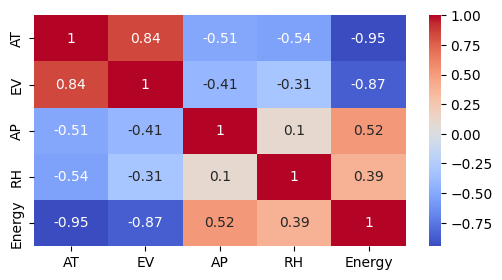

In [11]:
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.show()

* A positive correlation indicates that as one variable increases, the other also increases!  
* A negative correlation indicates that as one variable increases, the other decreases!  
> However correlation does not imply causation!    

### Assumptions:

> 1. Linearity

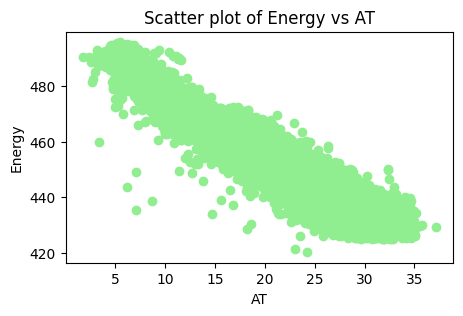

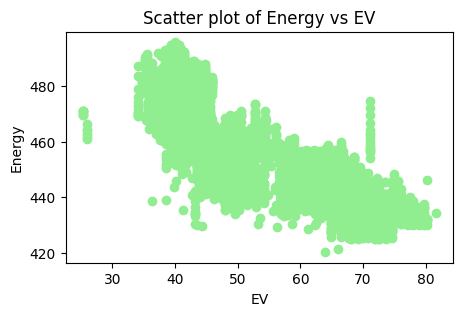

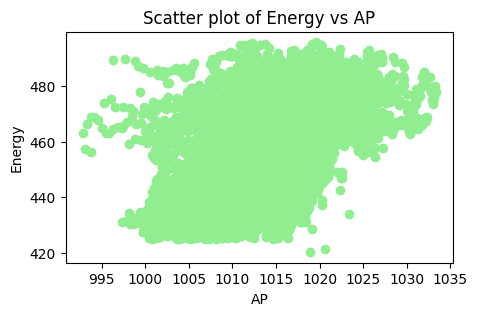

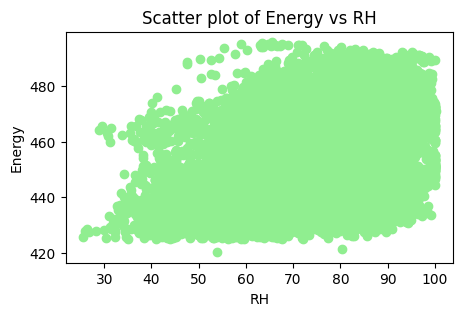

In [15]:
for var in X:
    plt.figure(figsize=(5,3))
    plt.scatter(powerPlant[var], powerPlant['Energy'], color='lightgreen')
    plt.xlabel(var)
    plt.ylabel('Energy')
    plt.title(f'Scatter plot of Energy vs {var}')
    plt.show()

## Model Building

Splitting the data to training and test set!

In [16]:
X.shape, y.shape

((9568, 4), (9568, 1))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6697, 4), (2871, 4), (6697, 1), (2871, 1))

In [20]:
# Multiple Linear Regression
multiple_linear_reg = LinearRegression()
# Training the model on training set!
multiple_linear_reg.fit(X_train, y_train)

LinearRegression()

### Model Coefficients

In [24]:
print("Intercept (b0): ", multiple_linear_reg.intercept_[0])

Intercept (b0):  467.8414177274578


In [22]:
coeff_df = pd.DataFrame(multiple_linear_reg.coef_[0], X.columns, columns=['Coefficient'])
print(coeff_df)

    Coefficient
AT    -2.004416
EV    -0.227127
AP     0.049301
RH    -0.159973


### The Multiple Linear Regression Equation

> **energy-hat = 467.841 - 2.004 AT  - 0.227 EV + 0.049 AP - 0.159 RH** 

### Interpretation of the coefficients:  

* Intercept (b0 = 467.841): The base value of the energy output when all the independent variables are zero! (A zero value may not make sense in this context)!  

*  Amgen Temperature (AT, coefficient = -2.004): For each one degree Celsius *increase* in Amgen Temperature, the energy output *decreases* by 2.004 MW, assuming all other variables remain constant!  

* Exhaust Vacuum (EV, coefficient = -0.2271): For each one cm Hg *increase* in Exhaust Vacuum, the energy output *decreases* by 0.2271 MW, assuming all other variables remain constant!   

* Ambient Pressure (AP, coefficient = 0.0493): For each one milibar *increase* in Ambient Pressure, the energy output *increases* by 0.0493!  

* Relative Humidity (RH, coefficient = -0.1599): For each one percent *increase* in Relative Humidity, the energy *decreases* by 0.1599 MW, assuming all other variables remain constant!  